EDA
notes:
- conda env: eda-ta, requirements-eda.txt

# IMPORT LIBRARY

In [7]:
import os
import xml.etree.ElementTree as ET
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from typing import Dict, List, Any
import numpy as np
from datetime import datetime


# LOAD DATASET

In [8]:
# Fungsi untuk mengekstrak data dari sebuah file XML
def extract_data_from_xml(file_path):
    tree = ET.parse(file_path)
    root = tree.getroot()
    
    # Ambil atribut utama
    main_attributes = root.attrib
    
    # Bagian-bagian dokumen
    sections = [
        "kepala_putusan",
        "identitas",
        "riwayat_penahanan",
        "riwayat_perkara",
        "riwayat_tuntutan",
        "riwayat_dakwaan",
        "fakta",
        "fakta_hukum",
        "pertimbangan_hukum",
        "amar_putusan",
        "penutup"
    ]
    
    # Extract data dari setiap section
    extracted_data = {section: (root.find(section).text.strip() if root.find(section) is not None else None) for section in sections}
    
    # Gabungkan atribut utama dan section
    data = {
        "id": main_attributes.get("id"),
        "amar": main_attributes.get("amar"),
        "amar_lainnya": main_attributes.get("amar_lainnya"),
        "klasifikasi": main_attributes.get("klasifikasi"),
        "lama_hukuman": main_attributes.get("lama_hukuman"),
        "lembaga_peradilan": main_attributes.get("lembaga_peradilan"),
        "provinsi": main_attributes.get("provinsi"),
        "status": main_attributes.get("status"),
        "sub_klasifikasi": main_attributes.get("sub_klasifikasi"),
        "url": main_attributes.get("url"),
    }
    data.update(extracted_data)
    return data

In [9]:
# Fungsi untuk memproses semua file XML dalam folder
def process_folder(folder_path):
    data_list = []
    for file_name in os.listdir(folder_path):
        if file_name.endswith(".xml"):
            file_path = os.path.join(folder_path, file_name)
            try:
                data = extract_data_from_xml(file_path)
                data_list.append(data)
            except Exception as e:
                print(f"Error processing file {file_name}: {e}")
    
    # Buat DataFrame dari semua data
    df = pd.DataFrame(data_list)
    return df


In [10]:
folder_path = "./dataset"
df = process_folder(folder_path)

In [11]:
df

,id,amar,amar_lainnya,klasifikasi,lama_hukuman,lembaga_peradilan,provinsi,status,sub_klasifikasi,url,...,identitas,riwayat_penahanan,riwayat_perkara,riwayat_tuntutan,riwayat_dakwaan,fakta,fakta_hukum,pertimbangan_hukum,amar_putusan,penutup
0,9f73f714b56ea3f527b70db6e50c29dc,pidana,pidana-penjara-waktu-tentu,pidana-khusus,1800,pn-bale-bandung,jabar,berkekuatan-hukum-tetap,narkotika-dan-psikotropika,https://putusan3.mahkamahagung.go.id/direktori...,...,nama lengkap muhajir abdul yakin alias supir a...,telah ditahan dengan surat perintah penetapan ...,terdakwa didampingi penasihat hukum yang berna...,setelah mendengar pembacaan tuntutan pidana ya...,menimbang bahwa terdakwa diajukan ke persidang...,menimbang bahwa untuk membuktikan dakwaannya p...,menimbang bahwa berdasarkan alat bukti dan bar...,menimbang majelis hakim bahwa selanjutnya akan...,mengadili\n1 menyatakan bahwa terdakwa muhajir...,demikian diputuskan dalam permusyawaratan maje...
1,897ab39e73aad4840e6e9e219681ba76,pidana,hukum,pidana-khusus,2520,pn-banjarnegara,jateng,berkekuatan-hukum-tetap,anak,https://putusan3.mahkamahagung.go.id/direktori...,...,nama lengkap terdakwa\ntempat lahir banjarnega...,terdakwa ditahan dalam tahanan rumah tahanan n...,terdakwa didampingi oleh penasihat hukum heri ...,setelah mendengar pembacaan tuntutan pidana ya...,menimbang bahwa terdakwa diajukan ke persidang...,menimbang bahwa untuk membuktikan dakwaannya p...,menimbang bahwa berdasarkan alat bukti dan bar...,None,mengadili\n1 menyatakan terdakwa terdakwa ters...,demikian diputuskan dalam sidang permusyawarat...
2,1ec57ffbc048ba23c02155362a25d509,pidana,hukum,pidana-umum,660,pn-banyuwangi,jatim,berkekuatan-hukum-tetap,kejahatan-terhadap-keamanan-negara,https://putusan3.mahkamahagung.go.id/direktori...,...,None,terdakwa ditahan di rutan banyuwangi sejak tan...,pengadilan negeri tersebut telah membaca penet...,telah mendengar pembacaan surat dakwaan ketera...,menimbang bahwa terdakwa didakwa oleh penuntut...,menimbang bahwa penuntut umum dipersidangan te...,None,None,mengadili\n1 menyatakan bahwa terdakwa zaenal ...,demikian diputuskan dalam rapat musyawarah maj...
3,20ff507cf5125c87e9f3279f3616745b,pidana,hukum,pidana-khusus,1620,pn-jakarta-selatan,jkt,berkekuatan-hukum-tetap,narkotika-dan-psikotropika,https://putusan3.mahkamahagung.go.id/direktori...,...,nama lengkap w a h y u tempat lahir jakarta um...,telah ditahan berdasarkan surat perintah penet...,terdakwa didampingi oleh penasihat hukum nya h...,telah mendengar tuntutan penuntut umum yang me...,menimbang bahwa terdakwa diajukan ke persidang...,menimbang bahwa untuk membuktikan dakwaannya p...,None,None,mengadili 1 menyatakan terdakwa w a h y u tela...,demikianlah diputuskan dalam permusyawaratan m...
4,78016b1eff654e2e939bc73c948059fe,pidana,hukum,pidana-khusus,2880,pn-madiun,jatim,berkekuatan-hukum-tetap,narkotika-dan-psikotropika,https://putusan3.mahkamahagung.go.id/direktori...,...,1 nama lengkap joko purwantono bin sukardi\n2 ...,terdakwa joko purwantono bin sukardi ditangkap...,terdakwa didampingi penasihat hukum eddy obaja...,setelah mendengar pembacaan tuntutan pidana ya...,menimbang bahwa terdakwa diajukan ke persidang...,menimbang bahwa untuk membuktikan dakwaannya p...,menimbang bahwa berdasarkan alat bukti dan bar...,menimbang bahwa selanjutnya majelis hakim akan...,mengadili\n1 menyatakan terdakwa joko purwanto...,demikianlah diputuskan dalam sidang permusyawa...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22625,d6a5caf93f02dbf1020e33782ae20038,pidana,pidana-penjara-waktu-tentu,pidana-umum,720,pn-malang,jatim,berkekuatan-hukum-tetap,pemalsuan,https://putusan3.mahkamahagung.go.id/direktori...,...,1 nama lengkap 2 tempat lahir 3 umur tanggal l...,None,terdakwa didampingi oleh penasehat hukum nya\n...,setelah mendengar pembacaan tuntutan pidana ya...,menimbang bahwa terdakwa diajukan ke persidang...,menimbang bahwa untuk membuktikan dakwaannya t...,None,None,mengadili\n1 men

# EXPLORATORY DATA ANALYSIS

In [12]:
# Asumsi DataFrame sudah dimuat, misalnya bernama df

# 1. Statistik Dasar
print("Info DataFrame:")
print(df.info())

print("\nJumlah Missing Values per Kolom:")
print(df.isnull().sum())

Info DataFrame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22630 entries, 0 to 22629
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  22630 non-null  object
 1   amar                22630 non-null  object
 2   amar_lainnya        22630 non-null  object
 3   klasifikasi         22630 non-null  object
 4   lama_hukuman        22630 non-null  object
 5   lembaga_peradilan   22630 non-null  object
 6   provinsi            22630 non-null  object
 7   status              22630 non-null  object
 8   sub_klasifikasi     22630 non-null  object
 9   url                 22630 non-null  object
 10  kepala_putusan      22628 non-null  object
 11  identitas           19749 non-null  object
 12  riwayat_penahanan   18644 non-null  object
 13  riwayat_perkara     22369 non-null  object
 14  riwayat_tuntutan    21667 non-null  object
 15  riwayat_dakwaan     22297 non-null  object
 16  fakta 

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22630 entries, 0 to 22629
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   id                  22630 non-null  object
 1   amar                22630 non-null  object
 2   amar_lainnya        22630 non-null  object
 3   klasifikasi         22630 non-null  object
 4   lama_hukuman        22630 non-null  object
 5   lembaga_peradilan   22630 non-null  object
 6   provinsi            22630 non-null  object
 7   status              22630 non-null  object
 8   sub_klasifikasi     22630 non-null  object
 9   url                 22630 non-null  object
 10  kepala_putusan      22628 non-null  object
 11  identitas           19749 non-null  object
 12  riwayat_penahanan   18644 non-null  object
 13  riwayat_perkara     22369 non-null  object
 14  riwayat_tuntutan    21667 non-null  object
 15  riwayat_dakwaan     22297 non-null  object
 16  fakta               21

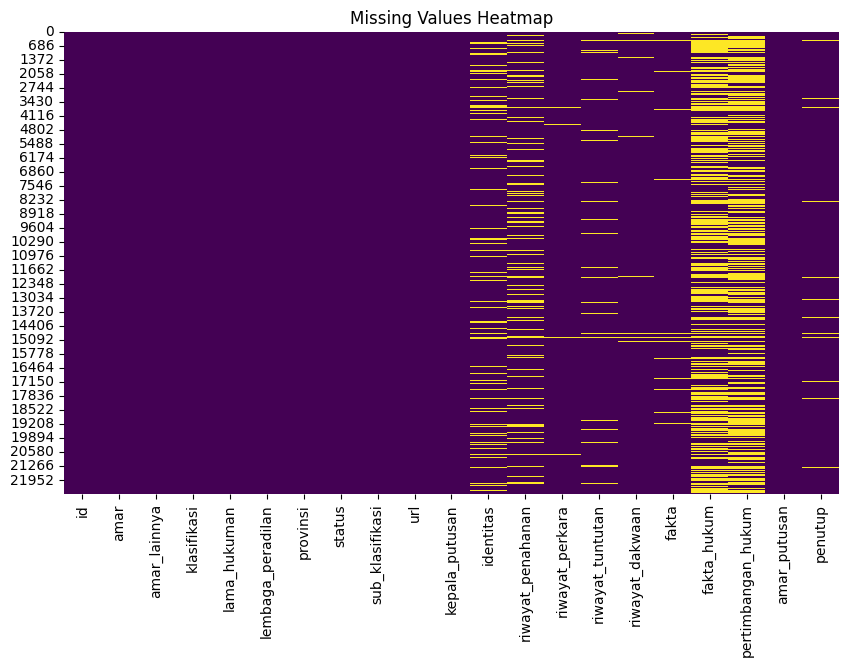

In [14]:
# 2. Visualisasi Missing Values
plt.figure(figsize=(10, 6))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.title("Missing Values Heatmap")
plt.show()

In [15]:
#unique valeu in klasifikasi columns
df['klasifikasi'].unique()

array(['pidana-khusus', 'pidana-umum'], dtype=object)

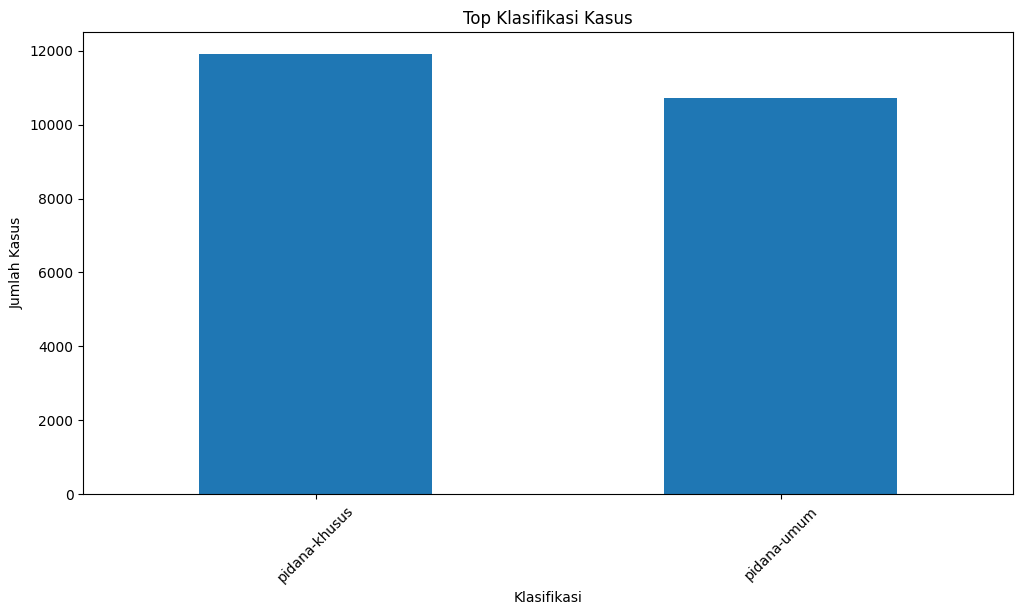

In [16]:
# 3. Distribusi Klasifikasi Kasus
plt.figure(figsize=(12, 6))
df["klasifikasi"].value_counts().head(10).plot(kind="bar")
plt.title("Top Klasifikasi Kasus")
plt.xlabel("Klasifikasi")
plt.ylabel("Jumlah Kasus")
plt.xticks(rotation=45)
plt.show()

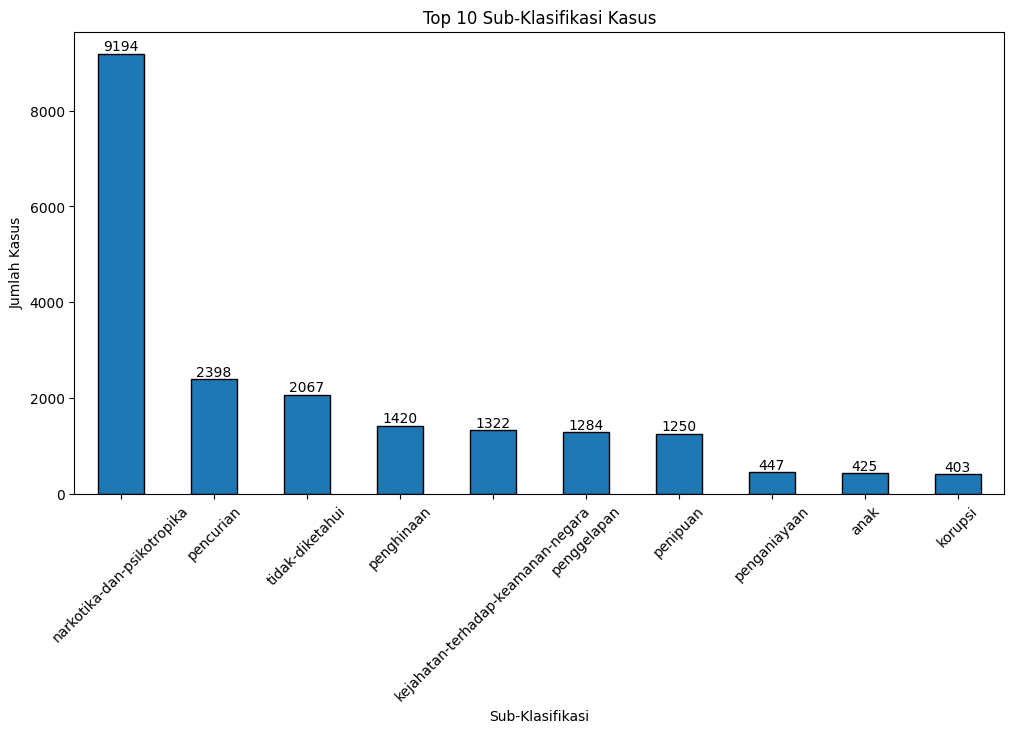

In [26]:
# Plot distribusi top 10 sub-klasifikasi
plt.figure(figsize=(12, 6))
top_10_sub_klasifikasi = df["sub_klasifikasi"].value_counts().head(10)
ax = top_10_sub_klasifikasi.plot(kind="bar", edgecolor='k')

# Tambahkan jumlah pada masing-masing batang
for i, value in enumerate(top_10_sub_klasifikasi):
    ax.text(i, value + 1, str(value), ha='center', va='bottom', fontsize=10)

plt.title("Top 10 Sub-Klasifikasi Kasus")
plt.xlabel("Sub-Klasifikasi")
plt.ylabel("Jumlah Kasus")
plt.xticks(rotation=45)
plt.show()


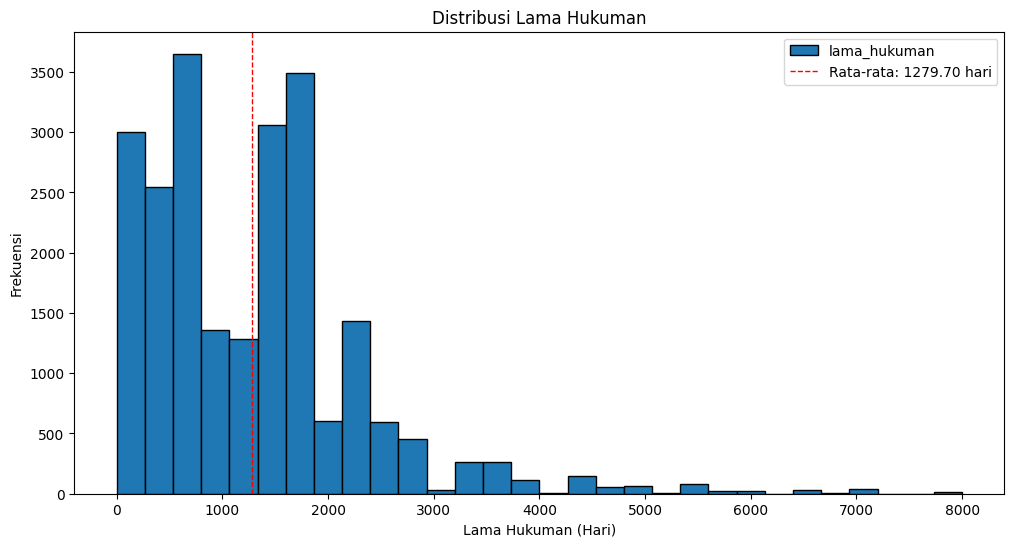

In [21]:
import matplotlib.pyplot as plt
import pandas as pd

# Contoh DataFrame
# df = pd.DataFrame({'lama_hukuman': [...]}) # Isi sesuai dengan data Anda

# Konversi kolom lama_hukuman menjadi numerik
df["lama_hukuman"] = pd.to_numeric(df["lama_hukuman"], errors="coerce")  

# Hitung statistik deskriptif
mean_hukuman = df["lama_hukuman"].mean()
max_hukuman = df["lama_hukuman"].max()
min_hukuman = df["lama_hukuman"].min()

# Plot histogram
plt.figure(figsize=(12, 6))
df["lama_hukuman"].dropna().plot(kind="hist", bins=30, edgecolor="k")

# Tambahkan statistik pada plot
plt.title("Distribusi Lama Hukuman")
plt.xlabel("Lama Hukuman (Hari)")
plt.ylabel("Frekuensi")
plt.axvline(mean_hukuman, color='red', linestyle='dashed', linewidth=1, label=f'Rata-rata: {mean_hukuman:.2f} hari')

plt.legend()
plt.show()


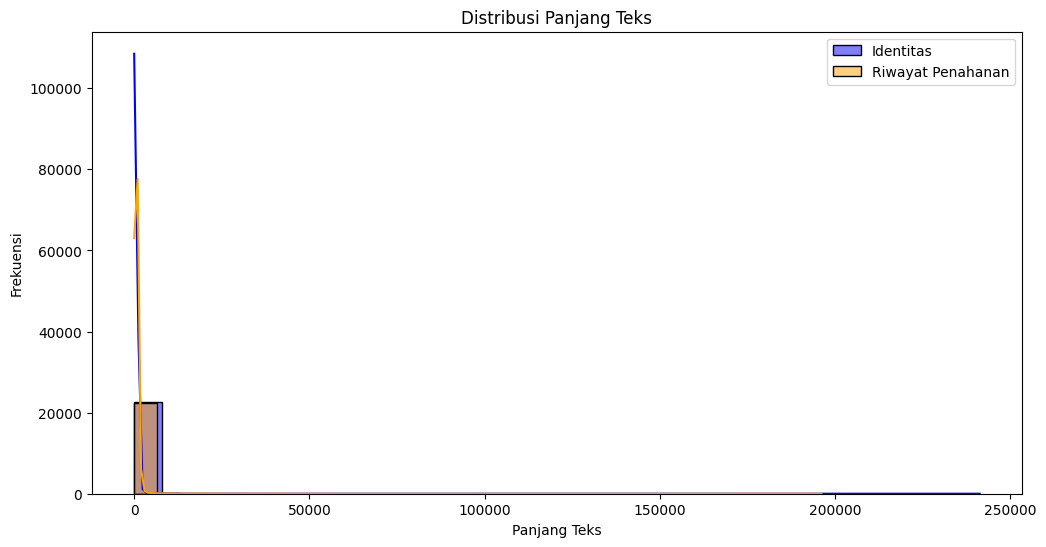

In [19]:
# 5. Analisis Teks
# Panjang teks di kolom tertentu
df["identitas_length"] = df["identitas"].fillna("").apply(len)
df["riwayat_penahanan_length"] = df["riwayat_penahanan"].fillna("").apply(len)
# Visualisasi Panjang Teks
plt.figure(figsize=(12, 6))
sns.histplot(df["identitas_length"], kde=True, color="blue", label="Identitas", bins=30)
sns.histplot(df["riwayat_penahanan_length"], kde=True, color="orange", label="Riwayat Penahanan", bins=30)
plt.title("Distribusi Panjang Teks")
plt.xlabel("Panjang Teks")
plt.ylabel("Frekuensi")
plt.legend()
plt.show()

Rata-rata panjang teks (Pertimbangan Hukum): 992.75
Rata-rata panjang teks (Fakta Hukum): 566.19


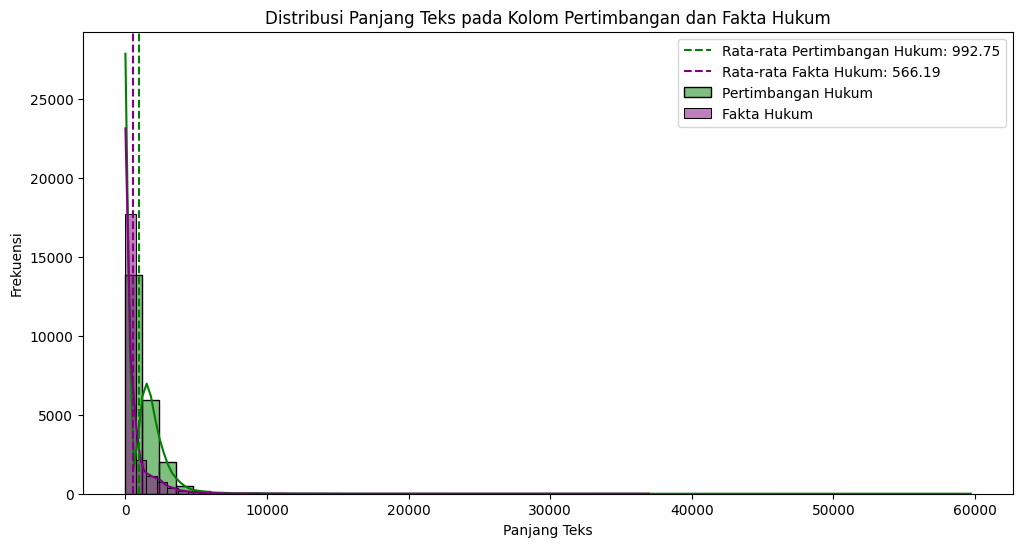

In [34]:
# Panjang teks di kolom pertimbangan hukum dan fakta hukum
# df["pertimbangan_hukum_length"] = df["pertimbangan_hukum"].fillna("").apply(len)
# df["fakta_hukum_length"] = df["fakta_hukum"].fillna("").apply(len)

# Menghitung jumlah kata di kolom pertimbangan_hukum dan fakta_hukum
df["pertimbangan_hukum_length"] = df["pertimbangan_hukum"].fillna("").apply(lambda x: len(x.split()))
df["fakta_hukum_length"] = df["fakta_hukum"].fillna("").apply(lambda x: len(x.split()))

# Tampilkan hasil
# print(df[["pertimbangan_hukum", "pertimbangan_hukum_word_count", "fakta_hukum", "fakta_hukum_word_count"]])

# Hitung mean panjang teks
mean_pertimbangan = df["pertimbangan_hukum_length"].mean()
mean_fakta = df["fakta_hukum_length"].mean()

print(f"Rata-rata panjang teks (Pertimbangan Hukum): {mean_pertimbangan:.2f}")
print(f"Rata-rata panjang teks (Fakta Hukum): {mean_fakta:.2f}")

# Visualisasi Panjang Teks dengan rentang lebih detail
plt.figure(figsize=(12, 6))
sns.histplot(df["pertimbangan_hukum_length"], kde=True, color="green", label="Pertimbangan Hukum", bins=50)
sns.histplot(df["fakta_hukum_length"], kde=True, color="purple", label="Fakta Hukum", bins=50)
plt.title("Distribusi Panjang Teks pada Kolom Pertimbangan dan Fakta Hukum")
plt.xlabel("Panjang Teks")
plt.ylabel("Frekuensi")
# Tambahkan garis vertikal untuk mean
plt.axvline(mean_pertimbangan, color="green", linestyle="--", linewidth=1.5, label=f"Rata-rata Pertimbangan Hukum: {mean_pertimbangan:.2f}")
plt.axvline(mean_fakta, color="purple", linestyle="--", linewidth=1.5, label=f"Rata-rata Fakta Hukum: {mean_fakta:.2f}")

plt.legend()
plt.show()
